In [1]:
import lightkurve as lk
from lightkurve import search_targetpixelfile


In [2]:
tpf = search_targetpixelfile(211328277, mission='K2', campaign=18).download()

In [3]:
tpf

KeplerTargetPixelFile Object (ID: 211328277)

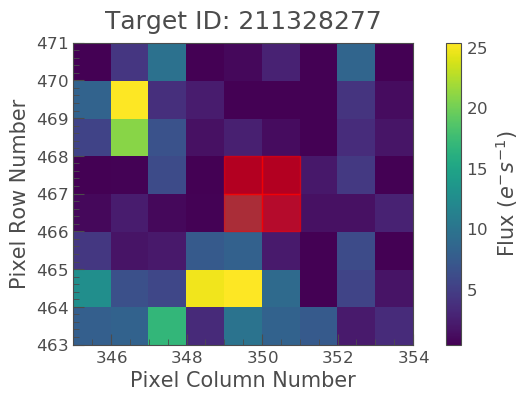

In [4]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask, mask_color='red')

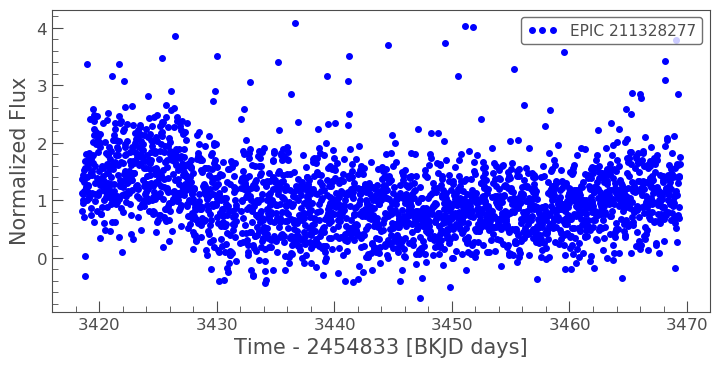

In [6]:
import matplotlib.pyplot as plt

user_lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
# Clean the light curve
user_lc = user_lc.remove_nans().remove_outliers()
user_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')
#plt.ylim(0.9,1.1)

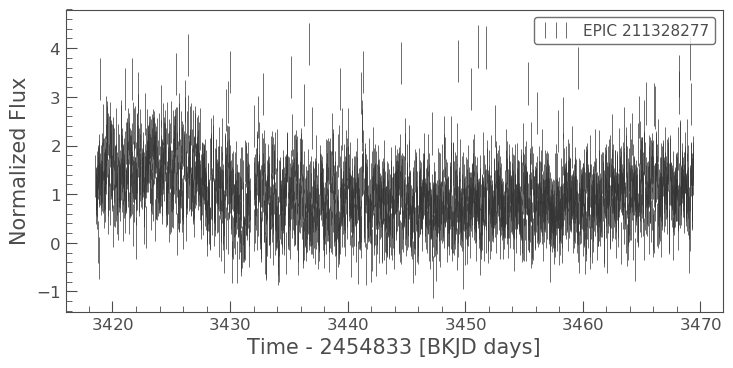

In [7]:
user_lc.errorbar();

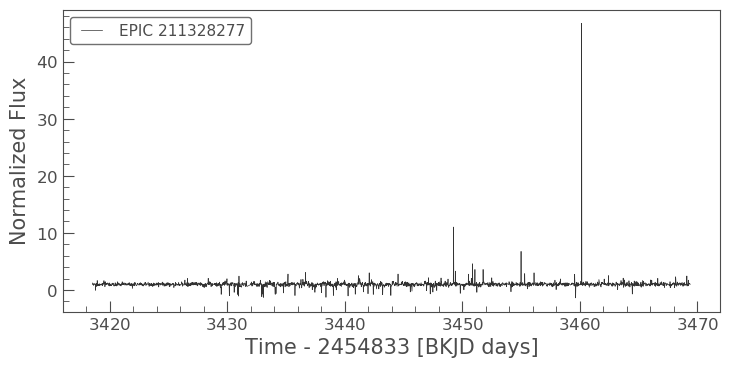

In [8]:
corrector = lk.correctors.SFFCorrector(user_lc)
new_lc_sff = corrector.correct(user_lc.centroid_col,user_lc.centroid_row)

new_lc_sff.plot()

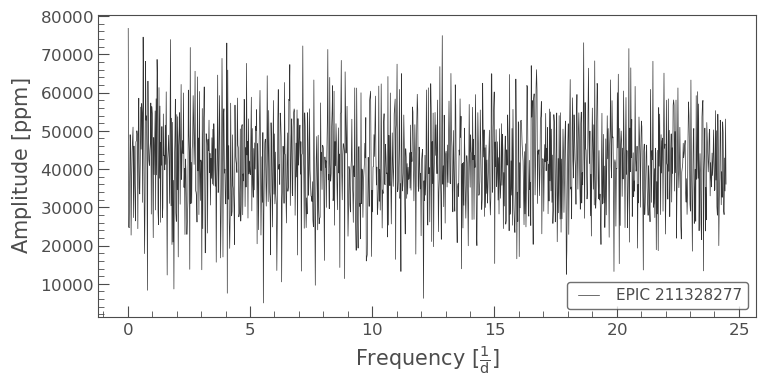

In [9]:
pg_sff = new_lc_sff.to_periodogram(oversample_factor=1)
pg_sff.plot()

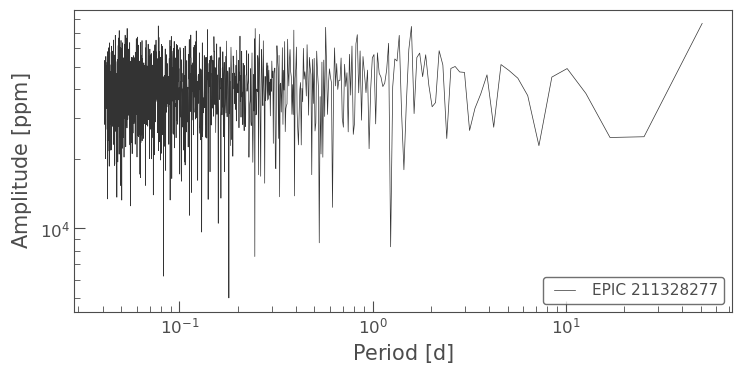

In [10]:
pg_sff.plot(view='period', scale='log')

Best period: 50.834532803033646 d


(0.9, 1.1)

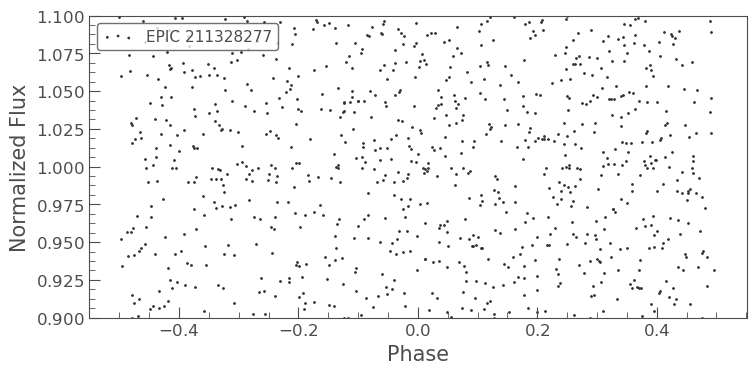

In [11]:
period = pg_sff.period_at_max_power
print('Best period: {}'.format(period))
new_lc_sff.fold(period.value).scatter();
plt.ylim(0.9,1.1)

Best period: 203.33813121213458 d


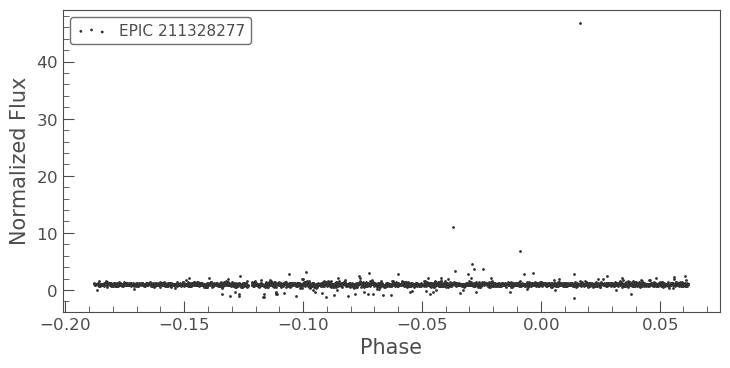

In [12]:
period = pg_sff.period_at_max_power * 4
print('Best period: {}'.format(period))
new_lc_sff.fold(period.value).scatter();

In [13]:
import astropy.units as u
pg_sff = new_lc_sff.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)

Best period: 1.2 d


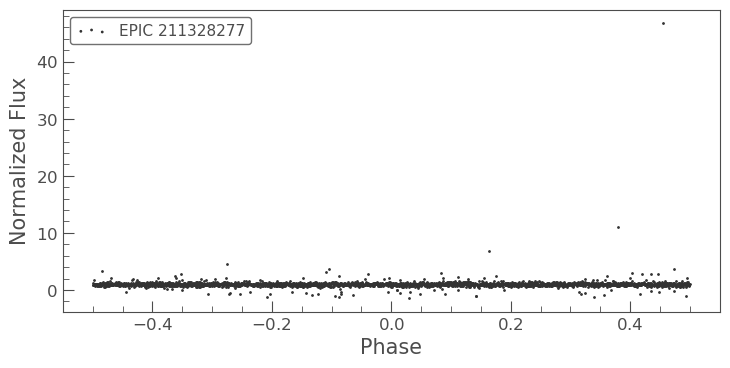

In [14]:
period = pg_sff.period_at_max_power
print('Best period: {}'.format(period))
new_lc_sff.fold(period.value).scatter();

In [2]:
tpf_short = search_targetpixelfile(211328277, mission='K2', campaign=18, cadence='short').download()

In [3]:
tpf_short

KeplerTargetPixelFile Object (ID: 211328277)

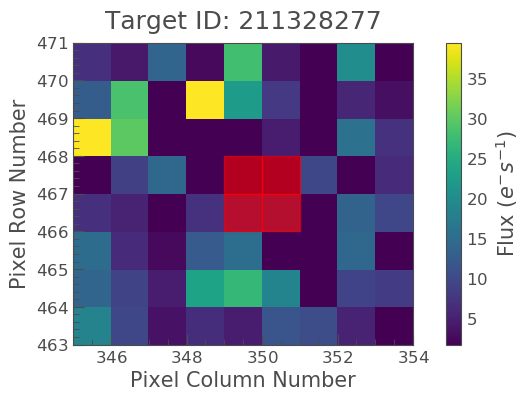

In [4]:
%matplotlib inline
tpf_short.plot(aperture_mask=tpf_short.pipeline_mask, mask_color='red')

(3418.5, 3418.65)

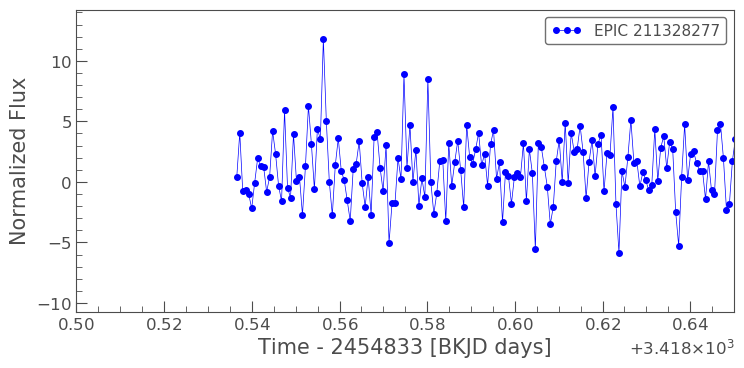

In [5]:
import matplotlib.pyplot as plt

user_lc_short = tpf_short.to_lightcurve(aperture_mask=tpf_short.pipeline_mask.astype(bool))
# Clean the light curve
user_lc_short = user_lc_short.remove_nans().remove_outliers()
user_lc_short.plot(marker='o',linestyle='-',markersize=4,color='blue')
#plt.ylim(0.9,1.1)
start=3418.5
interval=.15
plt.xlim(start,start+interval)

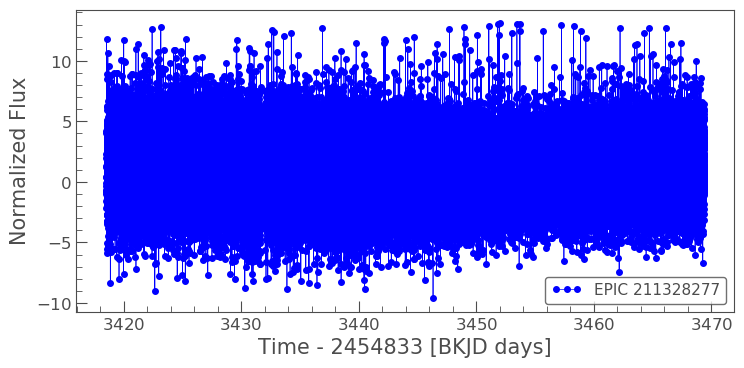

In [6]:
user_lc_short = tpf_short.to_lightcurve(aperture_mask=tpf_short.pipeline_mask.astype(bool))
# Clean the light curve
user_lc_short = user_lc_short.remove_nans().remove_outliers()
user_lc_short.plot(marker='o',linestyle='-',markersize=4,color='blue')
#plt.ylim(0.9,1.1)
start=3418.5
interval=.15